In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
from models.full_model import crease
from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM
#import seaborn as sns
#sns.set(color_codes=True)

data_dir = '/home/sander/Inv3D_pre/inv3d/data/'

In [5]:
from models import unetnc, backwardmapper, full_model
from custom_dataset import CustomImageDataset_wc, Dataset_backward_mapping, Dataset_full_model
from torch.utils.data import DataLoader

data_dir = '../../Inv3D_1_0_subset/data/'

dataset_test = Dataset_full_model(data_dir=data_dir+'test/', transform=True, img_size=256)
test_loader = DataLoader(dataset_test, batch_size= 16, num_workers=12)

model_full = crease()
model_full.load_state_dict(torch.load('models/pretrained/crease_monster_best.pkl'))
model_full.eval()
print('')

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import pytorch_lightning as pl
trainer = pl.Trainer(gpus=1, max_epochs = 10,
                    log_every_n_steps=25)

trainer.test(model_full, test_loader) 

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]


FileNotFoundError: [Errno 2] No such file or directory: 'home/sander/Inv3D_1_0_subset/data/test/'

In [14]:
for batch in test_loader:
    img, labels = batch
    import os


In [15]:
labels.keys()

dict_keys(['warped_bm', 'warped_uv', 'warped_angle', 'warped_text_mask', 'wc_gt', 'warped_curvature_gt'])

In [16]:
bm = model_full(img)

In [17]:
msssim_metric = ms_ssim( bm, labels['warped_bm'], data_range=1, size_average=True)
msssim_metric

tensor(0.9891, grad_fn=<MeanBackward0>)

In [23]:
from icecream import ic
unwarped_img = model_full.unwarp_image(img, bm.transpose(1,2).transpose(2,3))
#unwarped_img = unwarped_img.detach()
#unwarped_img = unwarped_img.transpose(1,2).transpose(2,3)
ic(unwarped_img.shape)
unwarped_img_gt = model_full.unwarp_image(img, labels['warped_bm'].transpose(1,2).transpose(2,3))
#unwarped_img_gt = unwarped_img_gt.transpose(1,2).transpose(2,3)
ic(unwarped_img_gt.shape)
msssim_metric = ms_ssim( unwarped_img , unwarped_img_gt, data_range=1, size_average=True)
ic(msssim_metric)

epe= torch.mean(torch.norm((unwarped_img - unwarped_img_gt),p=1,dim=(1)))
ic(epe)

ic| unwarped_img.shape: torch.Size([2, 256, 256, 3])
ic| unwarped_img_gt.shape: torch.Size([2, 256, 256, 3])


AssertionError: Image size should be larger than 160 due to the 4 downsamplings in ms-ssim

In [19]:
#unwarped_img[0].numpy().shape

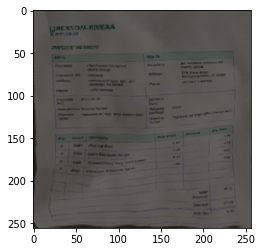

In [20]:
plt.imshow(unwarped_img[0].numpy())

In [4]:
model_full = crease()
model_full.load_state_dict(torch.load('models/pretrained/crease_monster_best.pkl'))
model_full.eval()

ordner = sorted(os.listdir(data_dir+'test/'))

for item in ordner[:200]:
    #utils.plt_crease(data_dir + 'test/' + item, model_full, 0)
    utils.crease_save_fig(data_dir + 'test/' + item, model_full, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
ic| label: 'warped_bm', labels[label].shape: torch.Size([2, 448, 448])
ic| label: 'warped_angle'
    labels[label].shape: torch.Size([2, 256, 256])


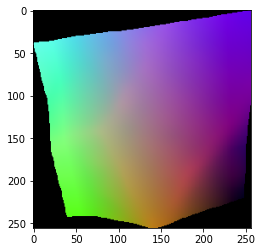

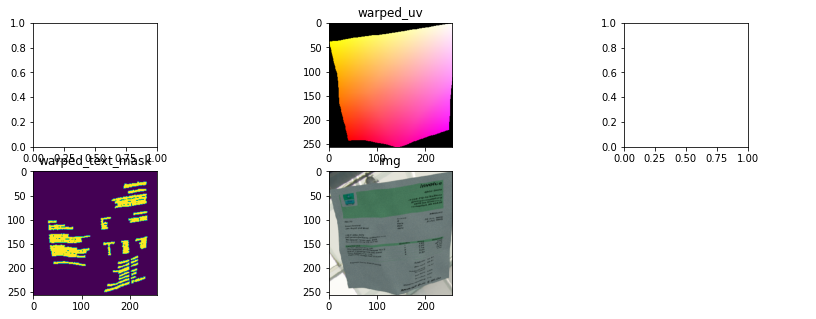

In [ ]:
from icecream import ic
wc, labels = utils.crop_all(data_dir + 'train/0000')
plt.imshow(wc.transpose(0,1).transpose(1,2))
fig, axs = plt.subplots(2,3, figsize=(15,5))
counter = -1
axs = axs.ravel()

for label in labels:
    counter += 1
    try:
        axs[counter].imshow(labels[label].transpose(0,1).transpose(1,2))
        axs[counter].set_title(label)
        #plt.imshow(labels[label].transpose(0,1).transpose(1,2))
    except TypeError:
        #pass
        ic(label,labels[label].shape)

    plt.axis('off')

## Checking Data Ranges

In [7]:
from icecream import ic
data_dir = '/home/sander/Inv3D_pre/inv3d/data/'
path = data_dir+'test/'
ordner = sorted(os.listdir(path))

bm_list = []
for item in ordner[:5]:
    #utils.compare_ssim_all(data_dir + item, bm_model)
    wc, labels = utils.crop_all(path + item)
    
    print('wc', wc.min(), wc.max())
    for label in labels:
        print(label, labels[label].min(), labels[label].max())


wc tensor(0.) tensor(0.9574)
warped_bm tensor(-1.) tensor(1.0000)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.4272) tensor(0.5829)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.0275) tensor(0.6275)
wc tensor(0.) tensor(0.9492)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.7328) tensor(0.5205)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.0235) tensor(1.)
wc tensor(0.) tensor(0.9127)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.0908) tensor(0.5816)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.0235) tensor(0.4588)
wc tensor(0.) tensor(0.9296)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.7284) tensor(0.1819)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.) tensor(0.7373)
wc tensor(0.) tensor(0.9661)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.3640) tensor(0.9342)
warped_text_mask tenso